# Airbnb Data Cleaning and Exploratory Data Analysis

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Converting Excel data to DataFrame

In [3]:
df=pd.read_excel(r'C:\Users\RBANDCO\Downloads\airbnb.xlsx')

In [4]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaT,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaT,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaT,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


### Understanding the data

In [5]:
df.shape

(30461, 13)

In [75]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Room Type', 'Zipcode', 'Beds', 'Number of Records',
       'Number Of Reviews', 'Price', 'Review Scores Rating'],
      dtype='object')

In [160]:
df.columns = df.columns.str.strip()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30461 entries, 0 to 30460
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30461 non-null  int64         
 1   Host Since                  30458 non-null  datetime64[ns]
 2   Name                        30461 non-null  object        
 3   Neighbourhood               30461 non-null  object        
 4   Property Type               30458 non-null  object        
 5   Review Scores Rating (bin)  22152 non-null  float64       
 6   Room Type                   30461 non-null  object        
 7   Zipcode                     30327 non-null  float64       
 8   Beds                        30376 non-null  float64       
 9   Number of Records           30461 non-null  int64         
 10  Number Of Reviews           30461 non-null  int64         
 11  Price                       30461 non-null  int64     

In [11]:
df.isnull().sum()

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8309
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8309
dtype: int64

### Data Cleaning

In [13]:
df=df.drop('Review Scores Rating (bin)',axis=1)

In [15]:
df=pd.DataFrame(df)

In [17]:
df=df.dropna(subset=['Host Since','Property Type','Zipcode','Beds'],axis=0)


In [19]:
df.isnull().sum()

Host Id                    0
Host Since                 0
Name                       0
Neighbourhood              0
Property Type              0
Room Type                  0
Zipcode                    0
Beds                       0
Number of Records          0
Number Of Reviews          0
Price                      0
Review Scores Rating    8230
dtype: int64

In [25]:
mean=df['Review Scores Rating'].mean()
mean

91.98773117644386

<Axes: ylabel='Frequency'>

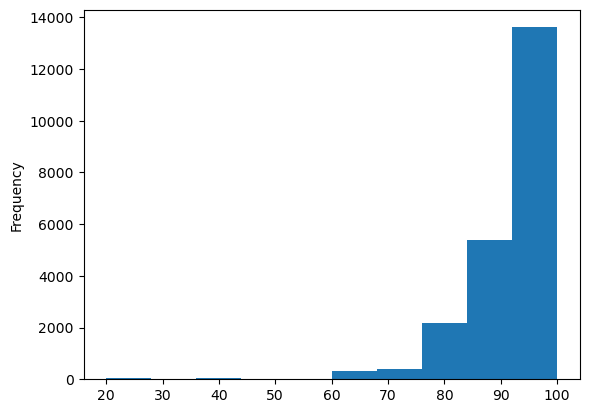

In [23]:
df['Review Scores Rating'].plot(kind='hist')

In [29]:
df['Review Scores Rating'].fillna(mean, inplace=True)

In [31]:
df.isnull().sum()

Host Id                 0
Host Since              0
Name                    0
Neighbourhood           0
Property Type           0
Room Type               0
Zipcode                 0
Beds                    0
Number of Records       0
Number Of Reviews       0
Price                   0
Review Scores Rating    0
dtype: int64

In [33]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,10024.0,3.0,1,0,199,91.987731
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036.0,3.0,1,39,549,96.000000
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,Entire home/apt,11222.0,1.0,1,4,149,100.000000
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,Entire home/apt,10004.0,1.0,1,9,250,100.000000
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,Private room,11201.0,1.0,1,80,90,94.000000


In [35]:
df.dtypes

Host Id                          int64
Host Since              datetime64[ns]
Name                            object
Neighbourhood                   object
Property Type                   object
Room Type                       object
Zipcode                        float64
Beds                           float64
Number of Records                int64
Number Of Reviews                int64
Price                            int64
Review Scores Rating           float64
dtype: object

In [43]:
df[['Zipcode','Beds']]=df[['Zipcode','Beds']].astype('int')

In [47]:
df[['Price']]=df[['Price']].astype('float')

In [49]:
df.dtypes

Host Id                          int64
Host Since              datetime64[ns]
Name                            object
Neighbourhood                   object
Property Type                   object
Room Type                       object
Zipcode                          int32
Beds                             int32
Number of Records                int64
Number Of Reviews                int64
Price                          float64
Review Scores Rating           float64
dtype: object

In [51]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
3,500,2008-06-26,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,Entire home/apt,10024,3,1,0,199.0,91.987731
4,500,2008-06-26,Trendy Times Square Loft,Manhattan,Apartment,Private room,10036,3,1,39,549.0,96.000000
5,1039,2008-07-25,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,Entire home/apt,11222,1,1,4,149.0,100.000000
6,1783,2008-08-12,Amazing Also,Manhattan,Apartment,Entire home/apt,10004,1,1,9,250.0,100.000000
7,2078,2008-08-15,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,Private room,11201,1,1,80,90.0,94.000000


### Basic Exploratory Data Analysis

In [57]:
df[['Beds','Number of Records','Price','Review Scores Rating']].mean()

Beds                      1.529351
Number of Records         1.000000
Price                   163.560505
Review Scores Rating     91.987731
dtype: float64

In [61]:
df[['Beds','Number of Records','Price','Review Scores Rating']].median()

Beds                      1.000000
Number of Records         1.000000
Price                   125.000000
Review Scores Rating     91.987731
dtype: float64

In [93]:
df1=df.groupby('Neighbourhood')['Price'].mean()
df1.sort_values(ascending=False)

Neighbourhood
Manhattan        198.182572
Staten Island    164.689655
Brooklyn         129.606615
Queens           103.348330
Bronx             95.044118
Name: Price, dtype: float64

In [95]:
df1=df.groupby('Property Type')['Price'].mean()
df1.sort_values(ascending=False)

Property Type
Other              394.659574
Villa              328.000000
Condominium        256.585106
Loft               222.107713
Townhouse          203.933824
Cabin              165.000000
Apartment          161.959796
House              157.034316
Boat               153.625000
Bungalow           150.750000
Castle             150.000000
Treehouse          149.500000
Tent               126.250000
Bed & Breakfast    106.776536
Camper/RV          103.571429
Chalet              99.000000
Dorm                76.900000
Hut                 75.000000
Lighthouse          39.000000
Name: Price, dtype: float64

In [97]:
df1=df.groupby('Room Type')['Price'].mean()
df1.sort_values(ascending=False)

Room Type
Entire home/apt    220.880291
Private room        91.462838
Shared room         80.434731
Name: Price, dtype: float64

In [99]:
df1=df.groupby('Beds')['Price'].mean()
df1.sort_values(ascending=False)

Beds
12    1418.750000
16     736.000000
9      618.000000
8      589.041667
11     535.800000
10     480.187500
5      410.946237
6      401.768362
7      341.377778
4      317.036129
3      268.711295
2      199.226644
1      127.740627
0       92.000000
Name: Price, dtype: float64

In [117]:
df[['Review Scores Rating','Price']].corr()

,Review Scores Rating,Price
Review Scores Rating,1.000000,0.038929
Price,0.038929,1.000000


In [119]:
df[['Beds','Price']].corr()

,Beds,Price
Beds,1.000000,0.316217
Price,0.316217,1.000000


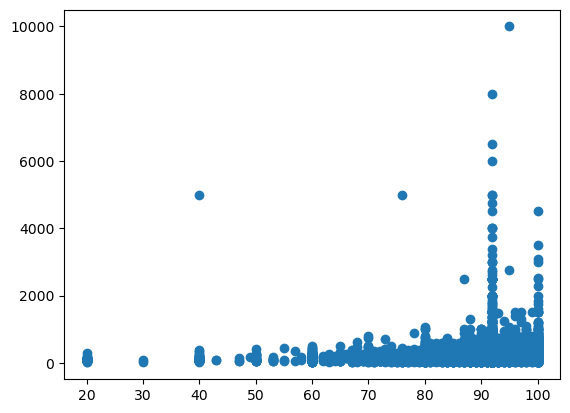

In [123]:
plt.scatter(df['Review Scores Rating'],df['Price'])

<Axes: ylabel='Frequency'>

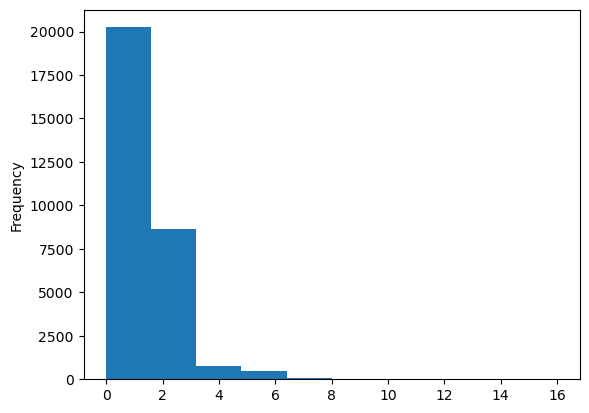

In [127]:
df['Beds'].plot(kind='hist')

<Axes: ylabel='Frequency'>

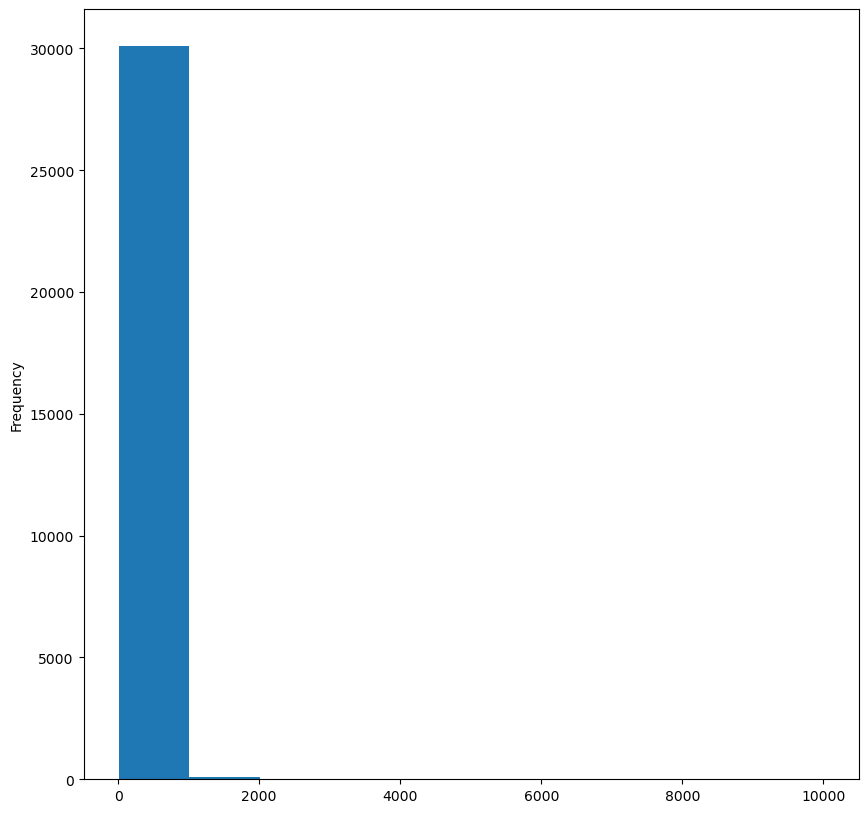

In [133]:
df['Price'].plot(kind='hist',figsize=(10,10))

<Axes: ylabel='Frequency'>

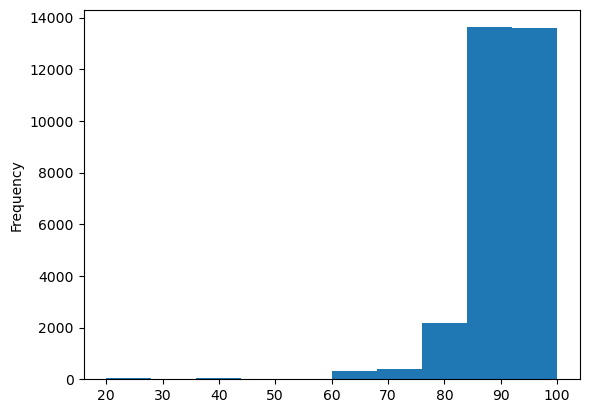

In [135]:
df['Review Scores Rating'].plot(kind='hist')

<Axes: ylabel='Frequency'>

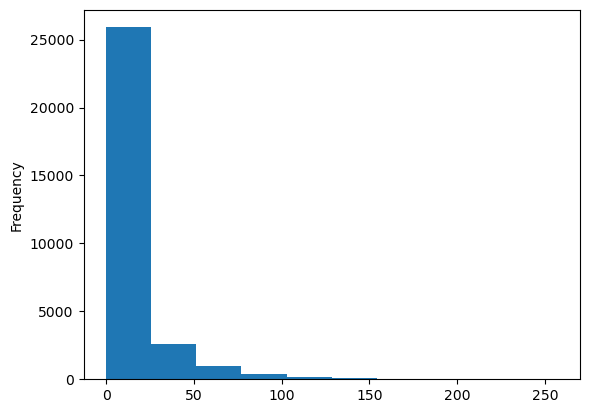

In [137]:
df['Number Of Reviews'].plot(kind='hist')

<Axes: xlabel='Neighbourhood', ylabel='count'>

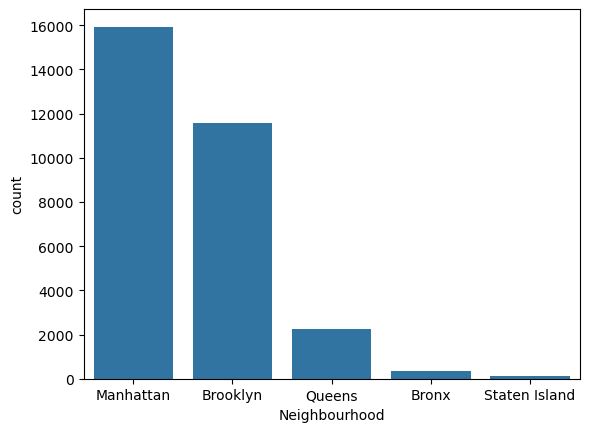

In [139]:
sns.countplot(x='Neighbourhood', data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apartment'),
  Text(1, 0, 'House'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Bed & Breakfast'),
  Text(4, 0, 'Loft'),
  Text(5, 0, 'Condominium'),
  Text(6, 0, 'Townhouse'),
  Text(7, 0, 'Dorm'),
  Text(8, 0, 'Boat'),
  Text(9, 0, 'Cabin'),
  Text(10, 0, 'Villa'),
  Text(11, 0, 'Bungalow'),
  Text(12, 0, 'Camper/RV'),
  Text(13, 0, 'Treehouse'),
  Text(14, 0, 'Tent'),
  Text(15, 0, 'Hut'),
  Text(16, 0, 'Lighthouse'),
  Text(17, 0, 'Chalet'),
  Text(18, 0, 'Castle')])

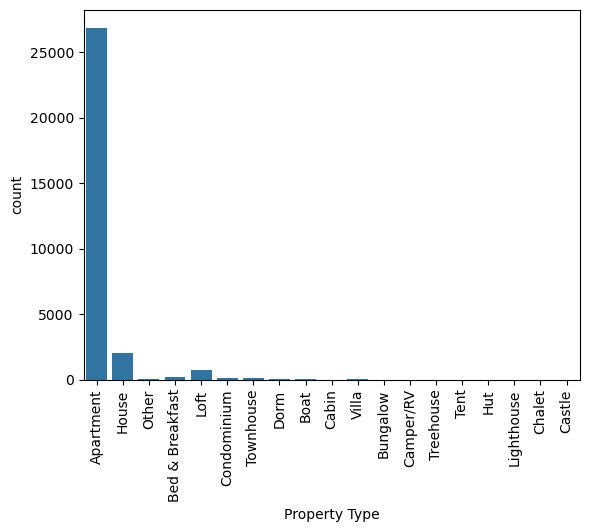

In [147]:
sns.countplot(x='Property Type', data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Room Type', ylabel='count'>

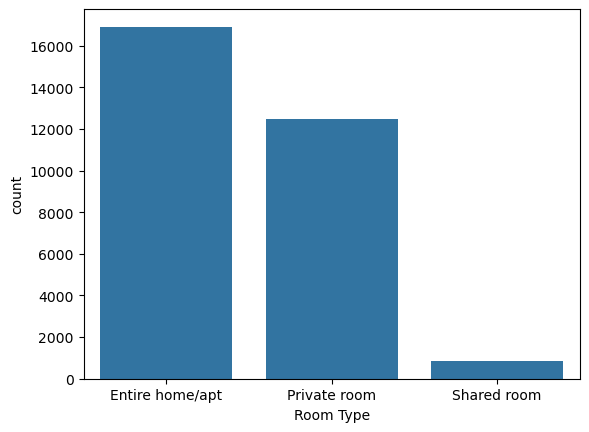

In [149]:
sns.countplot(x='Room Type', data=df)

### Exporting final data to Excel

In [153]:
df.to_excel(r'C:\Users\RBANDCO\Downloads\cleaned data.xlsx',index=False)